# Capstone Project: Deep Learning
## Identification of Plasmodium spp. from Thin Blood Smears using Deep Learning.
*Malaria diagnosis is performed as a thin blood smear by a Parasitologist with specialized training. There currently exists a need to have an alternative method to read blood smear slides for the detection of Malaria. The goal is to build a computer vision model that is successful at identifying Malaria infections at the species level collection of infected and uninfected blood smears would need to be analyzed for key features.*
### **Background**
Malaria is a vector-borne human pathogen.  Infection occurs when the *Plasmodium* parasite is transmitted to the bloodstream of a human host by way of the common mosquito, *Anopheles japonica*.  There are four species of the Plasmodium parasite causing human disease.  *Plasmodium falciparum, P. vivax, P. ovale, and Plasmodium malariae*.  The parasite matures in the human liver.  Key features of the parasite that would aid visualization of the parasite include chromatin dots, dark pigments, single mass dark pigmented, enlarged cytoplasm, chromatin dots, yellow-brown pigments, large chromatin, and dark-brown pigment.

According to the World Health Organization, there were an estimated 241 million infections and 627,000 deaths from Malaria.  Of the world regions laboring under the greatest number of infections and death are the African Regions.   The WHO African Region is the source of 95% of infections and 96% of deaths.  Testing is performed as a thin blood smear stained with Giema-Wright stain to visualize all phases of the parasite life cycle.    

### **Problem Definition**
#### *Context*
The number of certified Parasitology Microbiologists with the skill and expertise to read blood smear slides for Malaria is rapidly diminishing and the technical expertise is evaporating.  To best solve this subject matter gap it is proposed to *create a predictive algorithm to detect a Plasmodium spp. at any stage of the parasite life cycle among normal red blood cells?*  Can the model be further trained to speciate the detected Plasmodium spp. based on key features in the parasite morphology?

#### *Objectives*
Diagnosis of Malaria is performed as a thin blood smear by a trained and certified medical laboratory of health scientist.  Due to the specialized training required there are few certified professionals.  There currently exists a need to have an alternative method to read blood smear slides for detection of Malaria.  The goal is to build a computer vision model that is successful at identifying Malaria infections at the species level collection of infected and uninfected blood smears would need to be analyzed for key features.  The parasite has five stages to the the life cycle.  To successfully identify to the genus level common features that remain consistent across the parasite liefestyle.  

#### *Key Questions*
Plasmodium parasites damage red blood cells leaving behind cellular debris.  Can the code be trained to identify ruptured red blood cells and other cellular debris as noise to better detect parasites?

Plasmodium spp. that are of human interest are malariae, vivax, ovale, and falciparum; each with specific characteristics at each stage of growth.  The options for key features can remain static as a matrix of growth stages crossed by cell morphology key features.  Can the above be a matrix to classify by species?  

Can the system be trained to report key information required for diagnosis? Future features should include ELR using LOINC and SNOMED codes and be linkable to the LMS.  Refer to DPDx for reporting criteria.  
#### *Problem formulation*
*  Images are thin blood smears stained with Giemsa-Wright stain.  This is a differential stain in which the parasite stains a different color than the red blood cells and extracellular debris.  
* Use of uninfected smears will allow training to healthy normal red blood cells (RBC).  This training should permit early detection of RBC distortions capturing parasites at the Gametophyte stage.  This is particular to aid in the detection of *Plasmodium falciparum*.  
* Classification of enlarged RBC at the trophozoite stage is distinctive for the detection of vivax species.  
* Detection of Schüffner's dots at the ring stage of the parasite life cycle is another key feature as is the visualization of Ziemann's stippling when present from the trophozoite stage.
*  The edges of parasite structures can be defined using the known blue to purple color for the staining of the parasite.  Flattening the color range to highlight the parasite from background cell debris and healthy cells.

**Future Consideration**<br>
* Addition of a recommendation system for directed point-of-care testing for positive samples.  Integrate textbot to send reminder messages for appointments to follow up.  
* Web-based submission for localities without subject matter expertise as a telehealth lab.  Add precision to the model by adding digital PCR data when both are available.
* Abnormal liver function test (LFT) could be used in tandem to add weighted nodes to the algorithm and improve precision.  Future considerations to focus efforts to control the mosquito vectors by utilizing a comparison of breeding temperatures for mosquitoes and predict when to implement seasonal outreach to the community.  How is this affected by climate change?  Earlier season, hotter temperatures, longer season, seasonal rains leading to standing water.  The geographical distribution of *Plasmodium spp.* requires knowledge of differences in key features.
* Methods to reduce the endemic number of infections are currently limited to vector control.  Controlling the mosquito population by interrupting the Anopheles life cycle reduces the number of infected cases.  The Global Technical Strategy for Malaria 2016-2030 report by the World Health Organization lists a goal to reduce global Malaria mortality rates from the 2015 baseline.    

## **Methods**
### **Data Exploration**
This data set contains a series of thin blood smear images stained with the Giemsa-Wright differential stain for the detection of Malaria. The dataset is divided into training and test images, further organized, and labeled as 'Uninfected' or 'Parasitized'. The data source is a trusted source.

**Mount the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Library Import**

### Dataset
To evaluate the data parameters the data stored in the zip file must be extracted and read data into a DataFrame.  Then it is possible to evaluate the data for the dimensions and size.  Additionally, the data should be examined for missing values, normalizing the data, and consistency in language.

In [ ]:
#Data Handling library
import numpy as np
#from numpy.core.fromnumeric import size
import pandas as pd

#Graphing library
import matplotlib.pyplot as plt
%matplotlib inline

#Data Visualization library
import seaborn as sns
sns.set_color_codes(palette='dark')
sns.dark_palette=('seagreen')

#Machine Learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Suppress Python Library depreciation warnings
import warnings
warnings.filterwarnings('ignore')

#Set maximum size of pandas DataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [ ]:
#The dataset is named 'cell_images.zip' and is located in the Colab Notebooks/Capstone Project file.  
#The data is provided as a zip file that requires unzipping.  Load zipfile to open data set.
import zipfile
import os

#File location to be read
path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/cell_images.zip'

#Extract data files from zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Exploratory Data Analysis**
**Processing Image Data**

The images should be evaluated for image format consistency, image size and dimension, and pixel depth.  This can be accomplished using the Python library Pillow, an image processing library specifically with the capability to perform color space conversions, image resizing, and contrast enhancement.

In [ ]:
#Import Pillow Library as PIL
from PIL import Image

In [ ]:
#Assigning train data for infected and uninfected 
train_dir='/content/cell_images/train/'

#Designate image size for normality across data set.
SIZE=64

#Create list containers for the image data
train_images=[]

#Create a list container for Boolean value indicating infection state (0:uninfected, 1:infected)
train_label=[]

#Loading Training data into List
for folder_name in ['/parasitized/','/uninfected/']:
  images_path=os.listdir(train_dir + folder_name)
  for i, image_name in enumerate(images_path):
    try:
      #Open each image in sequence as exception coding
      image=Image.open(train_dir + folder_name + image_name)
      #Resize Images to 64x64 to standardize to same shape
      image=image.resize((SIZE,SIZE)) 
      #Convert the images to list 'train_images' as designated above
      train_images.append(np.array(image))
      #Create the infected and uninfected labels with conditional logic
      if folder_name=='/parasitized/':
        train_label.append(1)
      else:
        train_label.append(0)
    except Exception:
      pass

#Convert list above into NumPy Array
train_images=np.array(train_images)
train_label=np.array(train_label)

In [ ]:
#Assigning test data for infected and uninfected 
test_dir='/content/cell_images/test/'

#Designate image size for normality across data set.
SIZE=64

#Create list containers for the image data
test_images=[]

#Create a list container for Boolean value indicating infection state (0:uninfected, 1:infected)
test_label=[]

#Loading Test data into List
for folder_name in ['/parasitized/','/uninfected/']:
  images_path=os.listdir(test_dir + folder_name)
  for i, image_name in enumerate(images_path):
    try:
      #Open each image in sequence as exception coding
      image=Image.open(test_dir + folder_name + image_name)
      #Resize Images to 64x64 to standardize to same shape
      image=image.resize((SIZE,SIZE)) 
      #Convert the images to list 'train_images' as designated above
      test_images.append(np.array(image))
      #Create the infected and uninfected labels with conditional logic
      if folder_name=='/parasitized/':
        test_label.append(1)
      else:
        test_label.append(0)
    except Exception:
      pass

#Convert list above into NumPy Array
test_images=np.array(test_images)
test_label=np.array(test_label)

In [ ]:
#Determine the number of elements in each data set
print("There are a total of",len(train_images),"images in the Training Images dataset.")
print("There are a total of",len(train_label),"labels in the Training Labels dataset.")
print("There are a total of",len(test_images),"images in the Test Images dataset.")
print("There are a total of",len(test_label),"labels in the Test Labels dataset.")
print(". . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .")
#Check the shape of the dataset
print("The training dataset has the following shape: ", train_images.shape)
print("The test dataset has the following shape: ", test_images.shape)
print(". . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .")
#Use NumPy max, min to determine the range of data in test and train data sets.
print("The maximum value of the training dataset is",np.max(train_images))
print("The minimum value of the training dataset is",np.min(train_images))
print("The maximum value of the test dataset is",np.max(test_images))
print("The minimum value of the test dataset is",np.min(test_images))
print(". . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .")
#Pass NumPy Array to Pandas DataFrame
df_train=pd.DataFrame(train_label, columns=['Infection_Status'])
#Use the value_counts to count the total number of infected and uninfected cell types.
print("The number of training images are:\n",
      df_train['Infection_Status'].value_counts())

There are a total of 24958 images in the Training Images dataset.
There are a total of 24958 labels in the Training Labels dataset.
There are a total of 2600 images in the Test Images dataset.
There are a total of 2600 labels in the Test Labels dataset.
. . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .
The training dataset has the following shape:  (24958, 64, 64, 3)
The test dataset has the following shape:  (2600, 64, 64, 3)
. . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .
The maximum value of the training dataset is 255
The minimum value of the training dataset is 0
The maximum value of the test dataset is 255
The minimum value of the test dataset is 0
. . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .
The number of training images are:
 1    12582
0    12376
Name: Infection_Status, dtype: int64


**Observations about the data:**


*	There are a total of 24,958 images in both the Training Images and Training Labels data sets. For each image, there is an attached label to designate infection status of the blood smear. The training data set is resized images to 64x64x3. 
*	There are a total of 2600 images in the test data set, each with a corresponding label for infection status. 
*	Of the images in the training data set, there are 12,376 uninfected smears and 12,582 infected blood smears. There is a representative number of samples for both infected and uninfected specimen images. 
*	The minimum and maximum values span the pixel range of 0 to 255, the full dark to the light spectrum.


**Data Preparation**<br>
To prepare the images for machine learning the data shape and array must be determined.  The data must then be normalized to ensure each pixel has a similar distribution.  







In [ ]:
#Normalize the data.  There are 255 pixels thus all data will be normalized by dividing by 255.
norm_train_images = (train_images/255).astype('float32')
norm_test_images = (test_images/255).astype('float32')

In [ ]:
#Determine new data shapes following normalization.
#Check the shape of the dataset
print("The training dataset has the following shape: ", norm_train_images.shape)
print("The test dataset has the following shape: ", norm_test_images.shape)
print(". . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .")

The training dataset has the following shape:  (24958, 64, 64, 3)
The test dataset has the following shape:  (2600, 64, 64, 3)
. . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . .


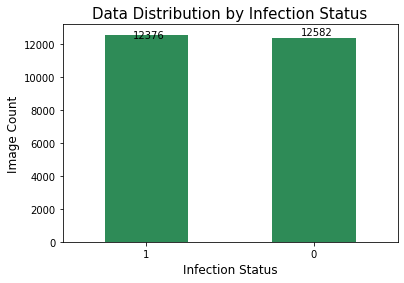

In [ ]:
#Plot the data to check for balance
#Bar Plot
set(df_train['Infection_Status'])
df_train['Infection_Status'].value_counts().plot(kind='bar', rot=0, color='seagreen')
plt.title('Data Distribution by Infection Status', fontsize=15)
plt.xlabel('Infection Status', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
plt.text(x = -0.08, y = df_train.Infection_Status.value_counts()[0]+1, s = df_train.Infection_Status.value_counts()[0])
plt.text(x = 0.92, y = df_train.Infection_Status.value_counts()[1]+1, s = df_train.Infection_Status.value_counts()[1])
plt.show()

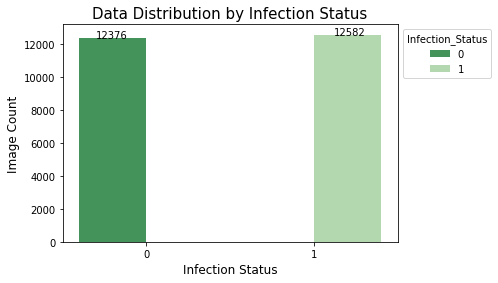

In [ ]:
#Count Plot to check for balance in test data
m=sns.countplot(data=df_train, x=df_train.Infection_Status, hue=df_train.Infection_Status, palette=("Greens_r"))
plt.text(x=-0.3, y = df_train.Infection_Status.value_counts()[0]+1, s = df_train.Infection_Status.value_counts()[0])
plt.text(x=1.12, y = df_train.Infection_Status.value_counts()[1]+1, s = df_train.Infection_Status.value_counts()[1])

#Move the legend position to center, add titles, labels, display plot.
#sns.move_legend(m, "center")
sns.move_legend(m, "upper left", bbox_to_anchor=(1,1))
plt.title('Data Distribution by Infection Status', fontsize=15)
plt.xlabel('Infection Status', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
plt.show()

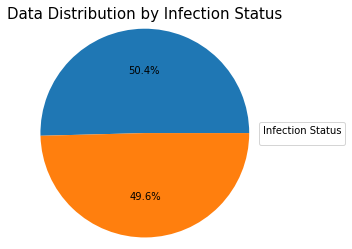

In [ ]:
#Pie Plot to check for balance in test data
p=plt.pie(df_train.value_counts(), autopct = '%.1f%%', radius=1.2)

#Generate Plot Title and position labels to be seen on the plot
uninfected_train=[float(df_train.Infection_Status.value_counts()[0])]
infected_train=[float(df_train.Infection_Status.value_counts()[1])]
plt.title('Data Distribution by Infection Status', fontsize=15, loc="center")
plt.legend(uninfected_train, infected_train,
           title="Infection Status",
           loc="center left",
           bbox_to_anchor=(1,0,0.5,1))
plt.show()

**Observations about the data:**
	
*   Normalizing the data created a dataset with similar distribution effectively adds speed to processing the model.  This normalization step also permits an even comparison of pixels in the model, with each pixel value now optimized for analysis.  With the values now ranging from 0 to 1, the images containing parasites now stand out as significant values compared to those images without those hues.
*   The count, bar, and pie plot all show an even number of infected and uninfected images in the test dataset.  The balance in the infected and uninfected samples will permit clear learning of uninfected cells to better identify parasites in positive samples. 
 


## **Data Exploration**

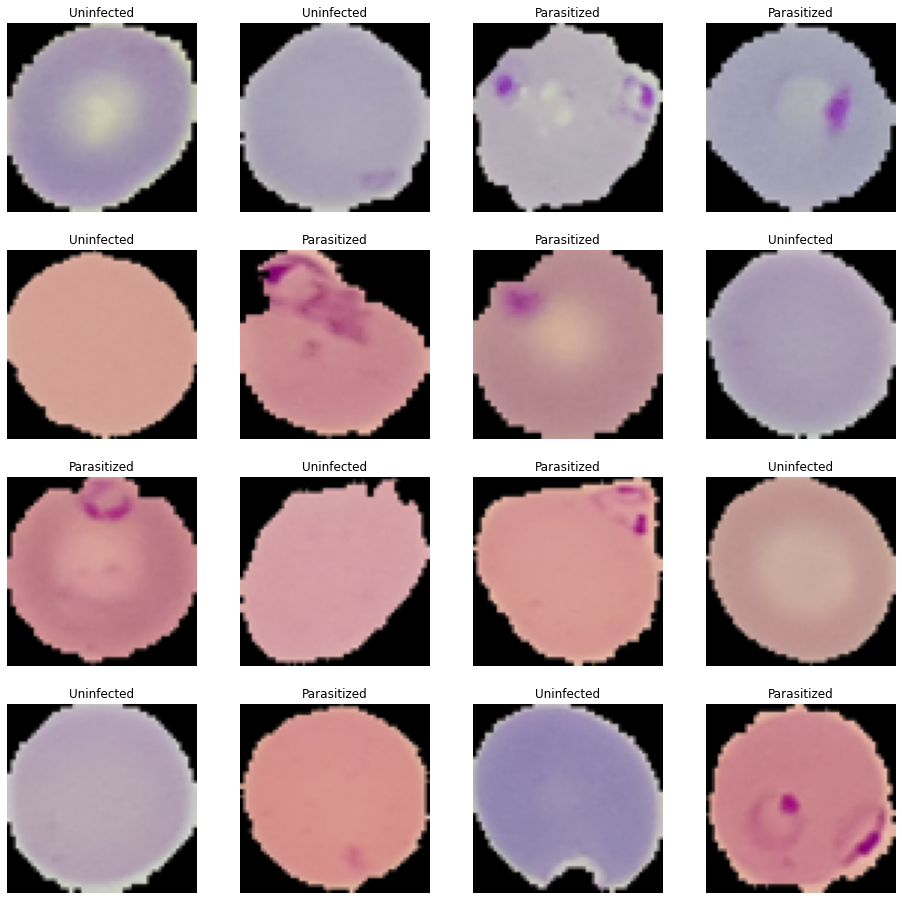

In [ ]:
#Visualize the images in the training dataset
np.random.seed(42)
plt.figure(1, figsize=(16,16))
for i in range (1,17):
  plt.subplot(4,4,i)
  index=int(np.random.randint(0,train_images.shape[0],1))
  if train_label[index]==1:
    plt.title('Parasitized')
  else:
    plt.title('Uninfected')
  plt.imshow(train_images[index])
  plt.axis('off')
plt.show()

**Observations:**
*   The key features of the images have been reduced to the presence or absence of a dense pink to purple collection of color in the image.  The shapes are inconsistent, and irregular in shape which prevents identification of the parasite life cycle but does clearly identify parasitized cells as containing dense pink to purple stained structures.
* The image normalization also removed most cellular debris which traditionally remains unstained or stains similar to the healthy red blood cells.  The misidentification of cellular debris as a parasite has been eliminated through normalization.  



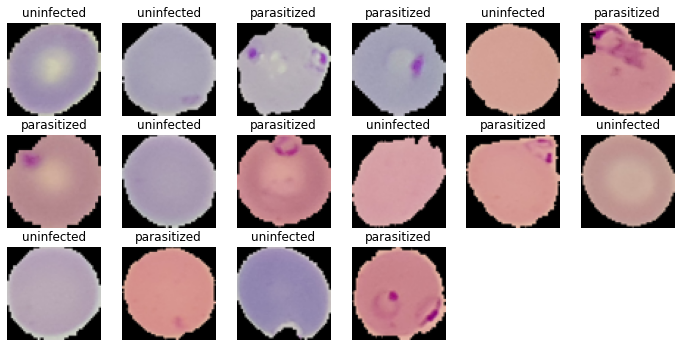

In [ ]:
#Another visualization of the images
np.random.seed(42)
plt.figure(1, figsize=(12,12))
for i in range (1,17):
  plt.subplot(6,6,i)
  index=int(np.random.randint(0,train_images.shape[0],1))
  if train_label[index]==1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')
  plt.imshow(train_images[index])
  plt.axis('off')
plt.show()

**Observations:**
*  As seen in the previous iteration of image classification; the presence of a dense, irregular pink-to-purple color in the image, clearly identifies parasitized cell structures.
*   The 12x12 image appears clearer, with well-defined edges to the parasite when present in the image as compared to the larger 16x16 size image seen in the previous step.  
*   The color of the parasite present in the images is clearly defined from the background in the image.  This suggests further processing should include leveraging the pigmentation of the stained parasite to enhance identification. 

### Plotting mean images for Infected and Uninfected Images
Before building the model the edges and shapes of the parasite must first be defined.  To determine the edges a Gaussian filter can be used to extract the edges of the parasite selecting for the specific hue of the stained parasite.  A Gaussian elimination method uses the image mean as a background subtraction element, centering the data around those values above the image mean.  


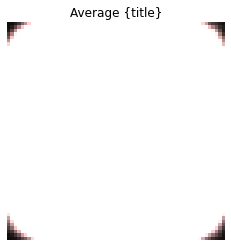

Mean Image for Infected Cells: [[[0.07455095 0.05619138 0.05547608]
  [0.06922588 0.05269433 0.05221745]
  [0.14679701 0.1103958  0.11278016]
  ...
  [0.23732316 0.19138452 0.18653632]
  [0.1475918  0.11603879 0.11111111]
  [0.08925449 0.06763631 0.06525195]]

 [[0.08297568 0.06310602 0.06270863]
  [0.16237482 0.12096646 0.12199968]
  [0.37378795 0.28532825 0.2925608 ]
  ...
  [0.44190113 0.3605945  0.35113654]
  [0.23501828 0.18955651 0.18534414]
  [0.14099507 0.11095215 0.10681927]]

 [[0.13193451 0.09958671 0.09712287]
  [0.34771896 0.26164362 0.25886187]
  [0.75806708 0.58384994 0.59179781]
  ...
  [0.75552376 0.61476713 0.59744079]
  [0.3892068  0.31417899 0.306708  ]
  [0.13908759 0.10848832 0.10546813]]

 ...

 [[0.18081386 0.1371801  0.14012081]
  [0.28127484 0.21467175 0.21745351]
  [0.56088062 0.43760928 0.44198061]
  ...
  [0.64687649 0.51955174 0.52742012]
  [0.35844858 0.28564616 0.28707678]
  [0.14433317 0.10983945 0.10793197]]

 [[0.07725322 0.05778096 0.05809887]
  [0.1

In [ ]:
#Defining the function to calculate the mean images.
def find_mean_img(full_mat, title):
  #Calculating the average for each image
  mean_img=np.mean(full_mat, axis=0)[0]
  #Reshaping encode to matrix
  plt.imshow(mean_img)
  #Plot title
  plt.title('Average {title}')
  #Turn off axes labels
  plt.axis('off')
  plt.show()
  return mean_img

#Calculating the mean image for the infected cells, label=1
#Create container list for infected data mean image values
infected_data=[]
for img, label in zip(train_images, train_label):
  if label==1:
    infected_data.append([img])
#Use defined function to determine mean for each image
infected_mean=find_mean_img(np.array(infected_data), 'Infected')
print('Mean Image for Infected Cells:', infected_mean)

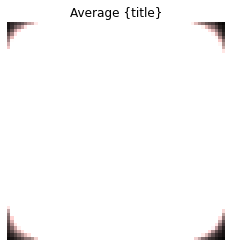

Mean Image for Uninfected Cells: [[[0.10754686 0.08944732 0.08928571]
  [0.19683258 0.16628959 0.16903685]
  [0.26866516 0.22769877 0.23327408]
  ...
  [0.17275372 0.14382676 0.14204913]
  [0.07886231 0.06423723 0.062298  ]
  [0.03910795 0.02989657 0.02844215]]

 [[0.10706206 0.09316419 0.09478022]
  [0.24442469 0.20353911 0.20685197]
  [0.44909502 0.36885908 0.37273756]
  ...
  [0.36158694 0.28975436 0.28967356]
  [0.16022948 0.12790886 0.12605042]
  [0.08492243 0.0674693  0.06585326]]

 [[0.18333872 0.15206852 0.15021008]
  [0.40853264 0.32958953 0.33306399]
  [0.77246283 0.62128313 0.63211054]
  ...
  [0.59841629 0.48408209 0.48739496]
  [0.29734971 0.23682935 0.23682935]
  [0.11546542 0.09558824 0.09518423]]

 ...

 [[0.19424693 0.15336134 0.15206852]
  [0.37112153 0.29557207 0.29427925]
  [0.61845507 0.49935359 0.49620233]
  ...
  [0.38720103 0.30631868 0.31286361]
  [0.22672915 0.18026826 0.18374273]
  [0.09251778 0.07449903 0.07700388]]

 [[0.11498061 0.09227537 0.09065934]
  [0

In [ ]:
#Defining the function to calculate the mean images.
def find_mean_img(full_mat, title):
  #Calculating the average for each image
  mean_img=np.mean(full_mat, axis=0)[0]
  #Reshaping encode to matrix
  plt.imshow(mean_img)
  #Plot title
  plt.title('Average {title}')
  #Turn off axes labels
  plt.axis('off')
  plt.show()
  return mean_img

#Calculating the mean image for the uninfected cells, label=0
#Create container list for uninfected data mean image values
uninfected_data=[]
for img, label in zip(train_images, train_label):
  if label==0:
    uninfected_data.append([img])
#Use defined function to determine mean for each image
uninfected_mean=find_mean_img(np.array(uninfected_data), 'Uninfected')
print('Mean Image for Uninfected Cells:', uninfected_mean)

**Observations:**
*   The image mean for images labeled parasitized have low mean values in the red and green channels of the image but the display ranges up to 0.1 in the blue channel in some cases.  This is consistent with the blue stain color the parasite retains when stained.  
* The image mean for the uninfected cells show higher image mean values in the red channel, ranging from 0.1 to 0.6 while the green and blue channels remain below 0.2.  This is consistent with the stained red blood cells and pink color is seen in the uninfected slide without color in the blue channel where the parasites are seen.
*   The image mean can be used to eliminate layers, adding a low pass filter to blur the image and assist in edge definition of the parasite using a Gaussian Blur as a filter.

## Image Processing for training data features. 
The Giemsa-Wright is a differential light microscopy stain that utilizes a pinkish stain for red blood cells, and deep pink for platelets.  *Plasmodium spp.* stain cytoplasms blue while parasitic nuclear structures uptake a red to purple stain inside the blue cytoplasm.  Schüffner's dots and other inclusion bodies stain red.  

Knowing the colors of the structures when stained, a hue saturation value can be assigned to the identifying structures of *Plasmodium spp.*


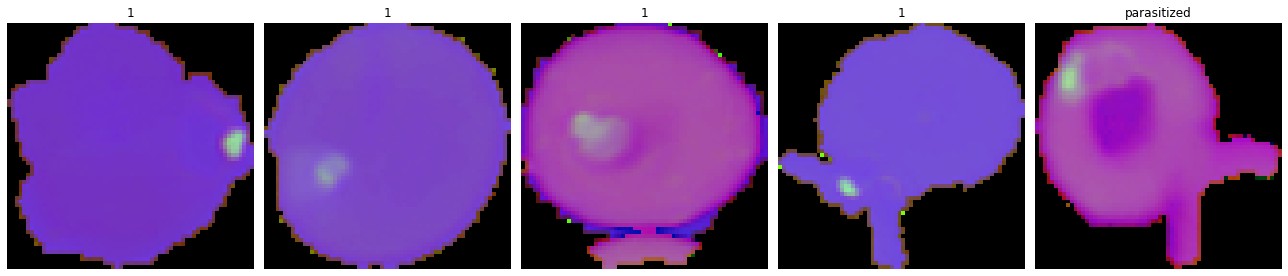

In [ ]:
#Import ComputerVision image processing library
import cv2

#Create a List Container for Hue Saturation Value Array
gfx=[]

#Convert RBG data to HSV list
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)
#Create HSV NumPy Array
gfx=np.array(gfx)

#Apply to and convert training data
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t, i in zip(range(5),viewimage):
  Title=train_label[i]
  ax[t].set_title(Title)
  if Title==1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

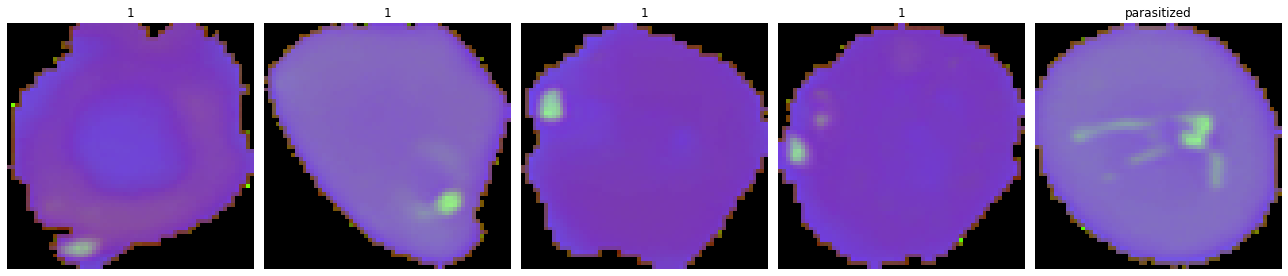

In [ ]:
#Import ComputerVision image processing library
import cv2

#Create a List Container for Hue Saturation Value Array
gfx=[]

#Convert RBG data to HSV list
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)
#Create HSV NumPy Array
gfx=np.array(gfx)

#Apply to and convert training data
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t, i in zip(range(5),viewimage):
  Title=train_label[i]
  ax[t].set_title(Title)
  if Title==1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observations:**
* Applying the hue saturation filter allows the parasite to be distinctly seen as a green, irregular shape with high luminosity while the red blood cells and any additional non-parasite structures are flattened and removed from the image, leaving only parasites against a purple background.  
* The distinctive color of the parasites now allows training to the edges of the parasite and visualization of the parasite by the machine learning model.
* Next steps include applying the Gaussian Blur as a filter to the image and defining key feature edges.

### Processing Image Data with Gaussian Blurring
The Gaussian Blur is a filter applied to computer vision models to define the edges of images while reducing the noise in the image.  This filter will allow contrastive learning between the parasitized and uninfected images to better detect the presence of parasites in the infected images.

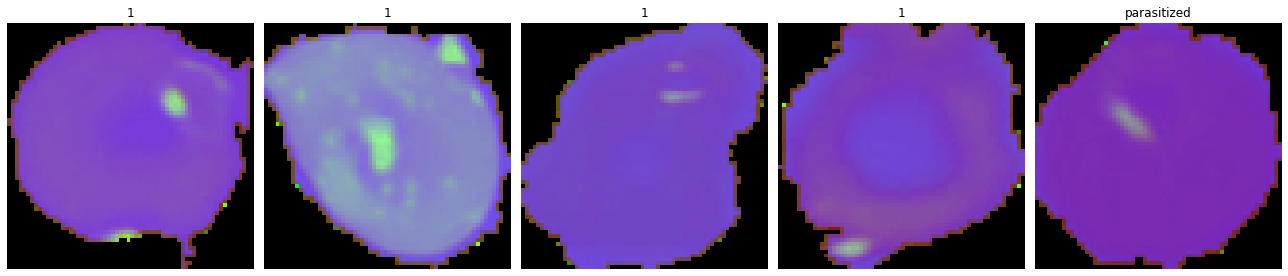

In [ ]:
#Create container list to hold blurred image data
gbx=[]
#Convert image data to Gaussian Blur
for i in np.arange(0,100,1):
  b=cv2.GaussianBlur(train_images[i], (5,5),0)
  gbx.append(b)
#Pass gbx list to NumPy Array
gbx=np.array(gbx)

#Apply to and convert training data
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t, i in zip(range(5),viewimage):
  Title=train_label[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()
  if Title==1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')


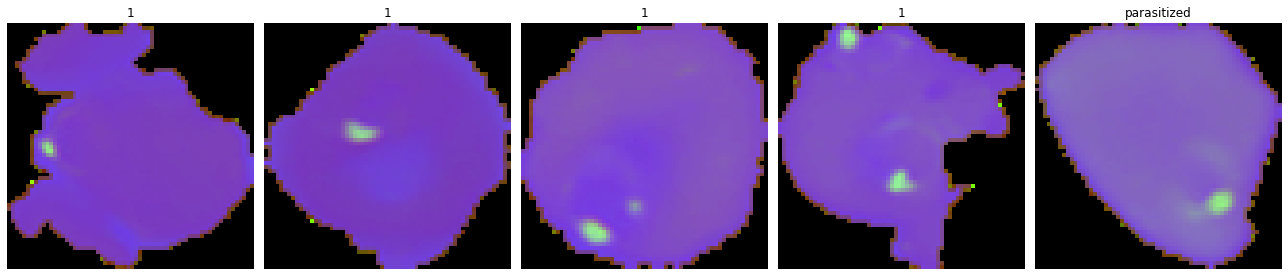

In [ ]:
#Create container list to hold blurred image data
gbx=[]
#Convert image data to Gaussian Blur
for i in np.arange(0,100,1):
  b=cv2.GaussianBlur(train_images[i], (5,5),0)
  gbx.append(b)
#Pass gbx list to NumPy Array
gbx=np.array(gbx)

#Apply to and convert test data
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t, i in zip(range(5),viewimage):
  Title=test_label[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()
  if Title==1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')

**Observations:**
* The subtraction of the image mean, hue saturation, and subsequent Gaussian Blur highlights the presence of shapes consistent with the parasite as vibrant green against a purple background.  This allows clear visualization of the parasite in the sample using machine learning.
* The relative value of the pixels in the green spectrum above a designated threshold could work as a prediction of the presence or absence of parasites in thin blood smears.
* As a high pass filter the Gaussian Blur establishes the edges of the image without adding noise and retaining key shape features.
* Building a Convolutional Neural Network is the next step, using the Gaussian Blur performance as a baseline.  The model should flatten and pool the dense layers trained over several epochs and model iterations to yield a high-performing model with a high degree of accuracy.  False negative samples could have serious health outcomes including mortality thus precision and accuracy must match or exceed the accuracy rate of traditional light microscopy.

### Works Cited

1.   *Detection of Blood Parasites.*  Clinical Microbiology Procedures Handbook, 3 Volume Set, 4th Edition
Amy L. Leber (Editor-in-Chief). [doi:10.1128/9781555818814.ch.9.8.1](https://www.wiley.com/en-us/Clinical+Microbiology+Procedures+Handbook%2C+3+Volume+Set%2C+4th+Edition-p-9781683673255)
2.   *Giemsa Stain.*  Clinical Microbiology Procedures Handbook, 3 Volume Set, 4th Edition
Amy L. Leber (Editor-in-Chief). [doi:10.1128/9781555818814.ch.9.8.1](https://www.wiley.com/en-us/Clinical+Microbiology+Procedures+Handbook%2C+3+Volume+Set%2C+4th+Edition-p-9781683673255)
3. Pillow Python Imaging Library.  [PIL Fork Documentation.](https://pillow.readthedocs.io/en/stable/)
4. OpenCV. [OpenCV: Smoothing Images API Documentation.](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
5. WHO Guidelines for malaria, 25 November 2022. Geneva: World Health Organization; 2022 (WHO/UCN/GMP/2022.01 Rev.3). License: CC BY-NC-SA 3.0 IGO.
6.  Center for Disease Control and Prevention Division of Parasitic Diseases and Malaria (DPDM).  [DPDx - Laboratory Identification of Parasites of Public Health Concern](https://www.cdc.gov/dpdx/malaria/index.html#print)
7. A. A. Alonso-Ramírez et al., *Classifying Parasitized and Uninfected Malaria Red Blood Cells Using Convolutional-Recurrent Neural Networks.* IEEE Access, vol. 10, pp. 97348-97359, 2022, [doi: 10.1109/ACCESS.2022.3206266](https://ieeexplore.ieee.org/abstract/document/9888070).
8. Jdey, I., Hcini, G., & Ltifi, H. (2022). Deep learning and machine learning for Malaria detection: overview, challenges and future directions. arXiv preprint [arXiv:2209.13292](https://arxiv.org/abs/2209.13292).



### Additional Datasets of Interest
Peripheral Blood Smear Red and White Blood Cell Detection: https://user-images.githubusercontent.com/3878466/80433866-dd0f6380-8900-11ea-8018-ecd4e8a7afe8.png" alt="Blood Cell Detection Dataset"

Malaria Stage Classifier dataset:
https://datasetsearch.research.google.com/search?src=2&query=Blood%20Cell%20Detection%20Dataset&docid=L2cvMTF0ZDk2eGs3eg%3D%3D

Malaria Cell Images Dataset (Infected and uninfected)
https://datasetsearch.research.google.com/search?src=2&query=Blood%20Cell%20Detection%20Dataset&docid=L2cvMTFqbnl2eHB2MA%3D%3D

World Malaria Statistics by country:
https://datasetsearch.research.google.com/search?src=2&query=malaria&docid=L2cvMTFzZ3ZtcXpibA%3D%3D